# Object Detection  - YOLO & OWL-ViT
This tutorial demonstrates how to use YOLO (You Only Look Once) from the [Ultralytics](https://github.com/ultralytics/yolov5) library for object detection. It includes steps for:

- Running object detection inference on images/videos
- Fine-tuning YOLO for custom datasets
- Comparing YOLO with OWl-VIT for zero-shot learning.


## 1. Perform Object Detection Inference
First thing We'll use YOLOv8 from Ultralyics for object detection on a sample image.
We aim to utilize the pre-trained YOLOv8 model to detect objects in a sample image. This involves loading the model, providing an image for input, and interpreting the model's predictions.

**Key Concepts:**
- **Inference**: The process of using a trained model to make predictions on new data.
- **YOLOv8**: A state-of-the-art version of the YOLO (You Only Look Once) architecture, known for its speed and accuracy in object detection tasks.

**Steps:**
1. Load the YOLOv8 model using the Ultralytics library.
2. Perform inference on a sample image to detect objects.
3. Visualize the results, including bounding boxes and class labels.

**Support Material:**
- https://docs.ultralytics.com/models/yolov8/
- https://docs.ultralytics.com/tasks/detect/

In [6]:
# Import YOLO and load a pre-trained model
from ultralytics import YOLO
import cv2

# Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # nano model for quick inference

# Run inference on a sample image

results = model('images/street_scene.jpg', save = False)  # Displays image with detections

for result in results:
    print(result.boxes)  # Boxes object for bounding box outputs



image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/street_scene.jpg: 384x640 13 persons, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 1 bench, 4 birds, 1 handbag, 1 potted plant, 64.4ms
Speed: 1.3ms preprocess, 64.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 2.,  0.,  0.,  0., 58.,  0.,  2.,  9.,  0., 14.,  0.,  3.,  0.,  1.,  2., 14., 14.,  2.,  0.,  2.,  2.,  0.,  0., 26.,  0.,  3.,  2.,  0.,  0.,  2., 14., 13.,  2.])
conf: tensor([0.9098, 0.9041, 0.9005, 0.8934, 0.8477, 0.8331, 0.8173, 0.7737, 0.7585, 0.7313, 0.6779, 0.6606, 0.6198, 0.5686, 0.5105, 0.5057, 0.5043, 0.4675, 0.4564, 0.4517, 0.4201, 0.4165, 0.4037, 0.4015, 0.3767, 0.3745, 0.3659, 0.3221, 0.3095, 0.3049, 0.2999, 0.2989, 0.2811])
data: tensor([[9.5592e-01, 3.6429e+02, 6.0592e+02, 6.1893e+02, 9.0984e-01, 2.0000e+00],
        [1.1789e+03, 4.2397e+02, 1.4806e+03, 8.6406e+02, 9.0414e-01, 0.0000e+00],
        [1.5657e+0

## 2. Fine-Tuning YOLO on Custom Dataset
Fine-tuning YOLO requires a dataset formatted in the YOLO format. We'll use a small public dataset for demonstration.
We will adapt the pre-trained YOLO model to a custom dataset. This process, known as fine-tuning, enables YOLO to specialize in detecting specific objects not included in its original training.

**Key Concepts:**
- **Fine-tuning**: Adapting a pre-trained model to new data by continuing the training process.
- **Custom Dataset**: A dataset that contains specific objects relevant to a new application, different from those YOLO was trained on (e.g. https://docs.ultralytics.com/datasets/detect/signature/.)

**Steps:**
1. Prepare the custom dataset by organizing images and labels in the required format.
2. Configure the YOLO training pipeline.
3. Train the model and evaluate its performance.

**Support Material:** 
- https://docs.ultralytics.com/modes/train/
- https://docs.ultralytics.com/modes/val/




In [7]:
# Download a sample dataset (e.g., Signature)
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/signature.zip
!unzip -q signature.zip -d ./datasets

In [9]:
# Train YOLO on the dataset
results = model.train(data='./datasets/signature.yaml', epochs=3, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.10.15 torch-2.5.1+cu124 CPU (AMD EPYC 7763 64-Core Processor)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/signature.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

Model summary: 225 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/signature/train/labels.cache... 143 images, 0 backgrounds, 0 corrupt: 100%|██████████| 143/143 [00:00<?, ?it/s]
val: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/signature/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]

Plotting labels to runs/detect/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      2.078       3.02      2.012         35        640: 100%|██████████| 9/9 [00:45<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         35         35    0.00152      0.457       0.13     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.464      2.133      1.541         31        640: 100%|██████████| 9/9 [00:43<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]

                   all         35         35    0.00314      0.943      0.245     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.125      1.656      1.295         31        640: 100%|██████████| 9/9 [00:43<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

                   all         35         35    0.00731      0.886      0.496      0.198



3 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.15 torch-2.5.1+cu124 CPU (AMD EPYC 7763 64-Core Processor)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


                   all         35         35     0.0073      0.886      0.496      0.198
Speed: 0.6ms preprocess, 58.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


In [12]:
# Lade das trainierte Modell (korrigierter Pfad)
model = YOLO("runs/detect/train2/weights/best.pt")

# Vorhersage mit dem Modell
results = model.predict("images/example_signature.jpg", conf=0.75)

image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/example_signature.jpg: 640x480 (no detections), 81.6ms
Speed: 2.0ms preprocess, 81.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


## 3. Zero-Shot Learning with OWL-ViT
Switch to `OWL-ViT` to see how it performs with zero-shot learning capabilities. Zero-shot means detecting objects without prior specific training.

OWL-ViT (Open Vocabulary Learning with Vision Transformers) is a cutting-edge model designed for open vocabulary object detection. Unlike traditional models, OWL-ViT combines vision transformers with text embeddings, enabling it to:\n\n
- Understand textual descriptions of objects, even if it hasn't seen them during training.
- Detect and classify objects based on descriptive input, making it suitable for diverse applications.
- Perform zero-shot learning by generalizing to new object classes without additional training.\n\n"

**Steps in Using OWL-ViT:**
1. Model Initialization**: Set up the OWL-ViT model.
2. Text Input for Object Descriptions: Provide descriptive prompts (e.g., 'a red car' or 'a black cat to guide detection.
3. Inference and Visualization: Process an image or video, detect objects based on text descriptions and visualize results.\n\n"

OWL-ViT excels in scenarios where predefined object classes are insufficient, such as detecting rare or domain-specific objects.

**Support Material**:
- https://huggingface.co/docs/transformers/en/model_doc/owlvit


In [14]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe


from transformers import pipeline

image = Image.open("images/street_scene.jpg")


def preprocess_outputs(output):
    input_scores = [x["score"] for x in output]
    input_labels = [x["label"] for x in output]
    input_boxes = []
    for i in range(len(output)):
        input_boxes.append([*output[i]["box"].values()])
    input_boxes = [input_boxes]
    return input_scores, input_labels, input_boxes


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="green", facecolor=(0, 0, 0, 0), lw=2)
    )


def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(10, 10))
    plt.imshow(raw_image)
    for i, box in enumerate(boxes):
        show_box(box, plt.gca())
        plt.text(
            x=box[0],
            y=box[1] - 12,
            s=f"{labels[i]}: {scores[i]:,.4f}",
            c="beige",
            path_effects=[pe.withStroke(linewidth=4, foreground="darkgreen")],
        )
    plt.axis("on")
    plt.show()

OWL_checkpoint = "google/owlvit-base-patch32"

text = [
    "a car",
    "a traffic light", 
    "a bicycle",
    "a motorcycle",
    "a person walking",
    "a person on the floor",
    "a church"
]

# Load the model
detector = pipeline(
    model= OWL_checkpoint,
    task="zero-shot-object-detection"
)

output = detector(
    image,
    candidate_labels = text
)

print(output)

input_scores, input_labels, input_boxes = preprocess_outputs(output)

# Show the image with the bounding boxes
show_boxes_and_labels_on_image(
    image,
    input_boxes[0],
    input_labels,
    input_scores
)


[{'score': 0.6169756054878235, 'label': 'a traffic light', 'box': {'xmin': 1173, 'ymin': 34, 'xmax': 1221, 'ymax': 149}}, {'score': 0.5236311554908752, 'label': 'a car', 'box': {'xmin': -7, 'ymin': 364, 'xmax': 603, 'ymax': 616}}, {'score': 0.49214524030685425, 'label': 'a car', 'box': {'xmin': 577, 'ymin': 341, 'xmax': 874, 'ymax': 460}}, {'score': 0.47999700903892517, 'label': 'a car', 'box': {'xmin': 339, 'ymin': 326, 'xmax': 617, 'ymax': 422}}, {'score': 0.4671855866909027, 'label': 'a car', 'box': {'xmin': 1025, 'ymin': 339, 'xmax': 1088, 'ymax': 380}}, {'score': 0.4635981321334839, 'label': 'a bicycle', 'box': {'xmin': 693, 'ymin': 401, 'xmax': 888, 'ymax': 568}}, {'score': 0.4177893102169037, 'label': 'a car', 'box': {'xmin': 1543, 'ymin': 370, 'xmax': 1792, 'ymax': 487}}, {'score': 0.34080979228019714, 'label': 'a person walking', 'box': {'xmin': 729, 'ymin': 301, 'xmax': 873, 'ymax': 509}}, {'score': 0.333407998085022, 'label': 'a person on the floor', 'box': {'xmin': 584, 'ym

<Figure size 1000x1000 with 1 Axes>


Detection Results:
[{'score': 0.6582111120223999, 'label': 'a yellow traffic light', 'box': {'xmin': 1173, 'ymin': 34, 'xmax': 1221, 'ymax': 149}}, {'score': 0.5997662544250488, 'label': 'a wooden bench', 'box': {'xmin': 1126, 'ymin': 613, 'xmax': 1728, 'ymax': 1021}}, {'score': 0.3922993540763855, 'label': 'a red flower pot', 'box': {'xmin': 241, 'ymin': 813, 'xmax': 409, 'ymax': 955}}, {'score': 0.32638728618621826, 'label': 'a person lying on the ground', 'box': {'xmin': 584, 'ymin': 691, 'xmax': 1154, 'ymax': 1000}}, {'score': 0.2585500478744507, 'label': 'a person sitting and reading', 'box': {'xmin': 408, 'ymin': 595, 'xmax': 658, 'ymax': 923}}, {'score': 0.25059741735458374, 'label': 'a person sitting and reading', 'box': {'xmin': 584, 'ymin': 691, 'xmax': 1154, 'ymax': 1000}}, {'score': 0.22361740469932556, 'label': 'a person sitting and reading', 'box': {'xmin': 1040, 'ymin': 408, 'xmax': 1329, 'ymax': 718}}, {'score': 0.19229872524738312, 'label': 'a person sitting and readi

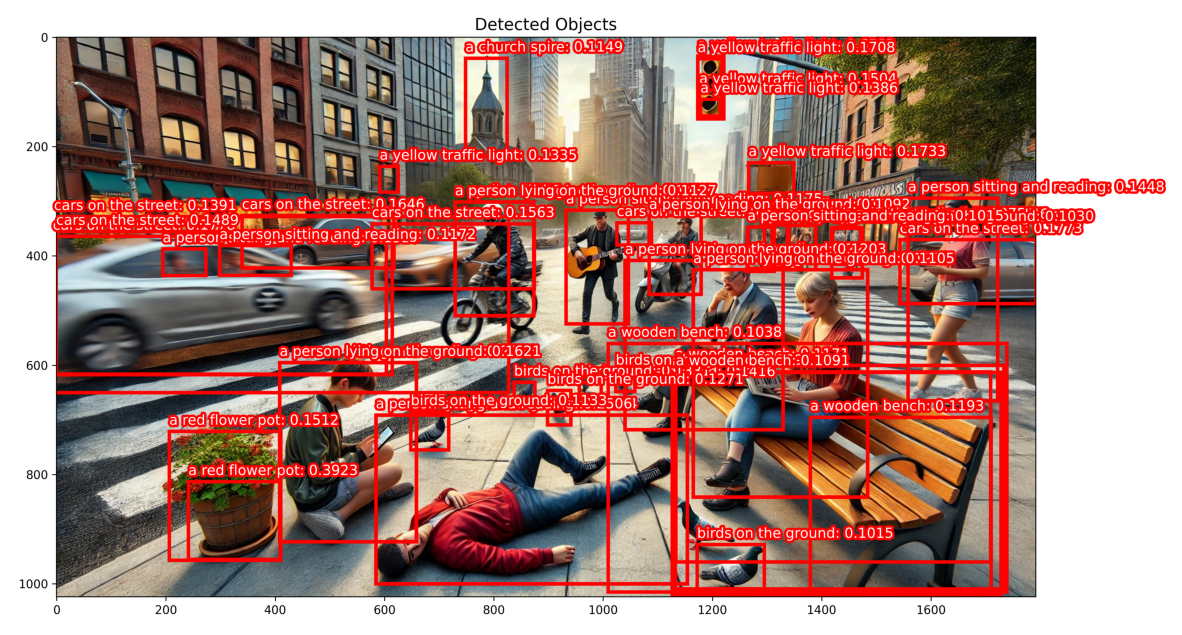

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from transformers import pipeline

# Bild laden
image = Image.open("images/street_scene.jpg")

def preprocess_outputs(output):
    input_scores = [x["score"] for x in output]
    input_labels = [x["label"] for x in output]
    input_boxes = []
    for i in range(len(output)):
        input_boxes.append([*output[i]["box"].values()])
    input_boxes = [input_boxes]
    return input_scores, input_labels, input_boxes

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="red", facecolor="none", lw=3)  # Rote Linie, dicker
    )

def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(15, 15))
    plt.imshow(raw_image)
    for i, box in enumerate(boxes):
        show_box(box, plt.gca())
        plt.text(
            x=box[0],
            y=box[1] - 12,
            s=f"{labels[i]}: {scores[i]:,.4f}",
            c="white",
            path_effects=[pe.withStroke(linewidth=4, foreground="red")],
            fontsize=12
        )
    plt.axis("on")
    plt.title("Detected Objects", fontsize=14)
    # Bild speichern
    plt.savefig('detected_objects.png', bbox_inches='tight', dpi=300)
    plt.close()

OWL_checkpoint = "google/owlvit-base-patch32"

text = [
    "a person lying on the ground",
    "a cyclist",
    "a guitarist",
    "a wooden bench",
    "birds on the ground",
    "a red flower pot",
    "a person sitting and reading",
    "a yellow traffic light",
    "cars on the street",
    "a church spire"
]

detector = pipeline(
    model=OWL_checkpoint,
    task="zero-shot-object-detection"
)

output = detector(
    image,
    candidate_labels=text,
    threshold=0.1
)

print("\nDetection Results:")
print(output)

input_scores, input_labels, input_boxes = preprocess_outputs(output)

# Bild mit Detektionen erstellen und speichern
show_boxes_and_labels_on_image(
    image,
    input_boxes[0],
    input_labels,
    input_scores
)

# Gespeichertes Bild laden und anzeigen
detected_image = Image.open('detected_objects.png')
plt.figure(figsize=(15, 15))
plt.imshow(detected_image)
plt.axis('off')
plt.show()

In [15]:
# Mit neuem Bild testen
new_image = Image.open("images/street_scene.jpg")

output = detector(
    new_image,
    candidate_labels = text
)

input_scores, input_labels, input_boxes = preprocess_outputs(output)

show_boxes_and_labels_on_image(
    new_image,
    input_boxes[0],
    input_labels,
    input_scores
)

<Figure size 1000x1000 with 1 Axes>